In [502]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\noonaja


In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter


In [417]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

* Import dataframe and check that columns and rows have been loaded

In [418]:
df = pd.read_csv(r"G:\front office\Rates\Sales Delivery\Noonan()\Sagar\l4w.csv", encoding = 'unicode_escape')
df.shape

(151, 27)

* Replace spaces in columns with an _    This will make it easier to query columns further in the report.

In [419]:
cols=df.columns
#This will replace any spaces in the column name with an _
cols = cols.map(lambda x: x.replace(' ', '_')if isinstance(x, (str,)) else x)
df.columns = cols


In [420]:
df.replace(" ","")

,ï»¿L3_Name,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nStd_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nStd_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nStd_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta)
0,INVESCO,US Treasuries,BET,"6,011",404,4.6,12%,93%,40%,1%,24%,910,459,4.9,52%,99%,37%,0%,35%,22,171,4.6,16%,99%,54%,5%,17%
1,GELBER GROUP LLC,US Treasuries,BET,"4,426",79,5.0,5%,51%,3%,0%,-,463,9,5.0,5%,52%,4%,0%,-,3,133,5.0,6%,54%,6%,0%,-
2,UBS ASSET MANAGEMENT,US Treasuries,BET,"2,546",370,5.0,18%,96%,35%,14%,71%,"1,202",321,5.0,27%,99%,47%,0%,23%,57,508,5.0,16%,85%,43%,9%,63%
3,EXODUSPOINT CAPITAL MANAGEMENT LP,US Treasuries,BET,"1,336",26,4.3,15%,89%,3%,0%,0%,30,5,4.0,36%,93%,29%,0%,0%,4,90,2.9,16%,93%,17%,0%,0%
4,BANCO DE LA REPUBLICA (COLUMBIA),US Treasuries,BET,"1,263",163,5.0,13%,100%,0%,0%,-,11,2,5.0,18%,100%,18%,0%,-,79,160,5.0,49%,100%,0%,0%,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,DRW INVESTMENTS LLC,US Treasuries,VOX,70,0,3.0,-,100%,-,-,-,2,0,3.0,-,100%,-,-,-,0,21,3.0,-,100%,-,-,-
147,BARCLAYS BANK (UK),US Treasuries,VOX,50,50,-,100%,100%,0%,0%,-,1,1,-,100%,100%,0%,0%,-,40,40,-,100%,100%,0%,0%,-
148,LOOMIS SAYLES AND COMPANY LP,US Treasuries,VOX,29,29,1.0,100%,100%,0%,0%,-,1,1,1.0,100%,100%,0%,0%,-,8,8,1.0,100%,100%,0%,0%,-
149,SWISS RE LTD,US Treasuries,VOX,25,25,-,100%,100%,0%,0%,-,1,1,-,100%,100%,0%,0%,-,20,20,-,100%,100%,0%,0%,-


In [421]:
df['RFQ_\n_Inquiry_\nVol_$m'] = df['RFQ_\n_Inquiry_\nVol_$m'].astype('str') 
df['RFQ_\nExecuted_\nVol_$m'] = df['RFQ_\nExecuted_\nVol_$m'].astype('str') 
df['RFQ_\nExecuted_\nTkts'] = df['RFQ_\nExecuted_\nTkts'].astype('str') 
df['RFQ_\nInquiry_\nTkts'] = df['RFQ_\nInquiry_\nTkts'].astype('str') 

In [422]:
df.dtypes

ï»¿L3_Name                                 object
Product                                    object
Inquiry_Origin_System                      object
RFQ_\n_Inquiry_\nVol_$m                    object
RFQ_\nExecuted_\nVol_$m                    object
RFQ_\nAverage_Dealers_\nVol                object
RFQ_\nStd_Hit_Rate_\n(Vol)                 object
RFQ_\nQuote__Rate_\n(Vol)                  object
RFQ__\nCover_Rate__\n(Vol)                 object
RFQ__\nTied_Rate__\n(Vol)                  object
RFQ__\nTied_Conversion_Rate_%_\n(Vol)      object
RFQ_\nInquiry_\nTkts                       object
RFQ_\nExecuted_\nTkts                      object
RFQ_\nAverage_Dealers_\nTkts               object
RFQ_\nStd_Hit_Rate_\n(Tkts)                object
RFQ_\nQuote_Rate_\n(Tkts)                  object
RFQ__\nCover_Rate__\n(Tkts)                object
RFQ__\nTied_Rate_\n(Tkts)                  object
RFQ__\nTied_Conversion_Rate__\n(Tkts)      object
RFQ_\nExecuted_\nDelta_$k                   int64


In [423]:
df['RFQ_\n_Inquiry_\nVol_$m'] = df['RFQ_\n_Inquiry_\nVol_$m'].str.replace(',', '')
df['RFQ_\nExecuted_\nVol_$m'] = df['RFQ_\nExecuted_\nVol_$m'].str.replace(',', '')
df['RFQ_\nExecuted_\nTkts'] = df['RFQ_\nExecuted_\nTkts'].str.replace(',', '')
df['RFQ_\nInquiry_\nTkts'] = df['RFQ_\nInquiry_\nTkts'].str.replace(',', '')

In [424]:
pd.set_option('display.max_columns', None)

#df = df.apply(pd.to_numeric)


Columns_to_convert = ['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m', 'RFQ_\nExecuted_\nTkts', 'RFQ_\nInquiry_\nTkts']

    
for col in Columns_to_convert:
    df[col] = pd.to_numeric(df[col],) #errors='coerce')
    
#print(df)

In [425]:
df.head(5)

,ï»¿L3_Name,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nStd_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nStd_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nStd_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta)
0,INVESCO,US Treasuries,BET,6011,404,4.6,12%,93%,40%,1%,24%,910,459,4.9,52%,99%,37%,0%,35%,22,171,4.6,16%,99%,54%,5%,17%
1,GELBER GROUP LLC,US Treasuries,BET,4426,79,5.0,5%,51%,3%,0%,-,463,9,5.0,5%,52%,4%,0%,-,3,133,5.0,6%,54%,6%,0%,-
2,UBS ASSET MANAGEMENT,US Treasuries,BET,2546,370,5.0,18%,96%,35%,14%,71%,1202,321,5.0,27%,99%,47%,0%,23%,57,508,5.0,16%,85%,43%,9%,63%
3,EXODUSPOINT CAPITAL MANAGEMENT LP,US Treasuries,BET,1336,26,4.3,15%,89%,3%,0%,0%,30,5,4.0,36%,93%,29%,0%,0%,4,90,2.9,16%,93%,17%,0%,0%
4,BANCO DE LA REPUBLICA (COLUMBIA),US Treasuries,BET,1263,163,5.0,13%,100%,0%,0%,-,11,2,5.0,18%,100%,18%,0%,-,79,160,5.0,49%,100%,0%,0%,-


* A Salesperson mapping needs to be created to identify which salesperson covers which client.

In [426]:
Salesmapping = df[['ï»¿L3_Name']].copy()
Salesmapping.shape

(151, 1)

In [427]:
SM = Salesmapping.drop_duplicates()
SM.shape
print(SM)

                                     ï»¿L3_Name
0                                       INVESCO
1                              GELBER GROUP LLC
2                          UBS ASSET MANAGEMENT
3             EXODUSPOINT CAPITAL MANAGEMENT LP
4              BANCO DE LA REPUBLICA (COLUMBIA)
..                                          ...
125              RESERVE BANK OF AUSTRALIA (AU)
127  GRANTHAM MAYO VAN OTTERLOO AND COMPANY LLC
129                                SWISS RE LTD
134                  TORONTO DOMINION BANK (CA)
138                                RBS TREASURY

[85 rows x 1 columns]


In [428]:
SalesDict = {"INVESCO"  : 'NOTARO', "GELBER GROUP LLC"   : 'MURPHY', "UBS ASSET MANAGEMENT": 'KELLY', 
             "EXODUSPOINT CAPITAL MANAGEMENT LP" : 'CELANDER', "BANCO DE LA REPUBLICA (COLUMBIA)" : 'MURPHY', 
             "RESERVE BANK OF AUSTRALIA (AU)" : 'NOTARO',
             "GRANTHAM MAYO VAN OTTERLOO AND COMPANY LLC" : "CELANDER", "SWISS RE LTD" : "LEWIS", "JP MORGAN INVESTMENT MANAGEMENT" : "LEWIS", "CITIGROUP GLOBAL MARKETS" : "NOTARO",
             "AMERICAN CENTURY INVESTMENT MANAGEMENT INC" : "CARRION", "BANK OF NEW YORK MELLON (US)" : "LEWIS", "PIMCO" : "CARRION", "MORGAN STANLEY INVESTMENT MANAGEMENT" : "LEWIS", 
             "BANCO CENTRAL DEL URUGUAY" : "MURPHY", "GARDA CAPITAL PARTNERS LP" : "MAGALDI", "RBS TREASURY" : "NOTARO", "TCW AM" : "CARRION",
             "BANCO CENTRAL DO BRASIL" : "MURPHY", "VERITION FUND MANAGEMENT LLC (US)" : "LEWIS", "OREGON STATE TREASURY" : "CARRION", "NORTHERN TRUST CORP (US)" : "KELLY",
             "LMR PARTNERS LLP" : "CELANDER", "DODGE AND COX" : "CARRION", "INTER-AMERICAN DEVELOPMENT BANK" : "MURPHY", "TIAA-CREF (US)" : "LEWIS", 
             "MILLENNIUM MANAGEMENT (US)" : "MURPHY", "FEDERATED INVESTORS" : "LEWIS", "ALLSTATE (US)" : "KELLY", "ROYAL BANK OF CANADA (CA)" : "MAGALDI",
             "VANGUARD GROUP" : "NOTARO", "EMPLOYEES RETIREMENT SYSTEM OF TEXAS" : "KELLY", "STATE OF TEXAS TREASURY" : "KELLY", "BRECKINRIDGE CAPITAL ADVISORS INC" : "CARRION",
             "INTERNATIONAL BANK FOR RECONSTRUCTION & DEVELOPMENT (IBRD US)" : "MURPHY", "FORD MOTOR (US)" : "NOTARO", "DRW INVESTMENTS LLC" : "MAGALDI",
             "DV TRADING LLC" : "CARRION", "INSIGHT INVESTMENT MANAGEMENT (UK)" : "LEWIS", "NEW YORK STATE TEACHERS RETIREMENT SYSTEM" : "MURPHY",
             "BANCO DE MEXICO" : "MURPHY", "WELLS CAPITAL MANAGEMENT" : "CARRION", "BARCLAYS BANK (UK)" : "CELANDER",
             "JEFFERIES GROUP" : "MURPHY", "TUDOR INVESTMENT CORPORATION" : "MAGALDI", "ELLIOTT MANAGEMENT CORPORATION" : "LEWIS",
             "ALLIANCEBERNSTEIN LP" : "KWALWASSER" , "UBS" : "NOTARO" , "RP INVESTMENT ADVISORS" : "NOTARO", "UNITED NATIONS" : "MURPHY", 
             "VOYA FINANCIAL INC" : "MAGALDI", "DENVER INVESTMENTS (US)" : "CARRION", "PAYDEN & RYGEL INC" : "CARRION", "CAPSTONE INVESTMENT ADVISORS" : "LEWIS",
             "ONTARIO TEACHERS PENSIONS PLAN (OTPP CA)" : "MAGALDI", "CANADIAN IMPERIAL BANK OF COMMERCE (CA)" : "MAGALDI", "NATIONAL BANK OF CANADA (CA)" : "MURPHY",
             "ENSIGN PEAK ADVISORS INC" : "CARRION", "JANUS HENDERSON" : "CARRION", "WESTERN AM" : "CARRION", "BANCO CENTRAL DE RESERVA DEL PERU (PE)" : "MURPHY",
             "FIDELITY (FMR)" : "CELANDER", "SQUAREPOINT CAPITAL LLP" : "LEWIS", "PUTNAM IM" : "CELANDER", "SUN LIFE COMPANY OF CANADA" : "CELANDER",
             "BANK OF AMERICA MERRILL LYNCH (BAML)" : "KWALWASSER", "BLUECREST CAPITAL" : "KWALWASSER", "III OFFSHORE ADVISORS" : "MAGALDI",
             "LOOMIS SAYLES AND COMPANY LP" : "CARRION", "MASS FINANCIAL SERVICES (MFS)" : "CELANDER", "US BANK NATIONAL ASSOCIATION (US)" : "MURPHY",
             "MANULIFE" : "CELANDER", "WELLINGTON MANAGEMENT (US)" : "CELANDER", "STATE BOARD OF ADMINISTRATION OF FLORIDA" : "KELLY",
             "STATE STREET" : "CELANDER", "DEUTSCHE BUNDESBANK (DE)" : "MURPHY", "SWISS NATIONALBANK" : "MURPHY", "PGIM INVESTMENTS (PRUDENTIAL)" : "LEWIS",
             "CAPULA INVESTMENT" : "LEWIS", "GSAM" : "CELANDER", "NEUBERGER BERMAN FIXED INCOME LLC" : "KELLY", "NORGES BANK (NO)" : "MURPHY",
             "CPPIB (CA)" : "MAGALDI", "TORONTO DOMINION BANK (CA)" : "MAGALDI", "HEALTHCARE OF ONTARIO PENSION PLAN TRUST FUND (CA)" : "NOTARO"
             
        
             
            }








SM['Salesperson'] = SM['ï»¿L3_Name'].map(SalesDict)

print(SM)

                                     ï»¿L3_Name Salesperson
0                                       INVESCO      NOTARO
1                              GELBER GROUP LLC      MURPHY
2                          UBS ASSET MANAGEMENT       KELLY
3             EXODUSPOINT CAPITAL MANAGEMENT LP    CELANDER
4              BANCO DE LA REPUBLICA (COLUMBIA)      MURPHY
..                                          ...         ...
125              RESERVE BANK OF AUSTRALIA (AU)      NOTARO
127  GRANTHAM MAYO VAN OTTERLOO AND COMPANY LLC    CELANDER
129                                SWISS RE LTD       LEWIS
134                  TORONTO DOMINION BANK (CA)     MAGALDI
138                                RBS TREASURY      NOTARO

[85 rows x 2 columns]


** Check that every account has a mapped salesperson

In [429]:
nan_values = SM[SM['Salesperson'].isna()]

print (nan_values)

Empty DataFrame
Columns: [ï»¿L3_Name, Salesperson]
Index: []


** This code merges the two dataframes, the initial dump of data and the dictionary of account to salesperson.

In [430]:
MERGE = pd.merge(
...     SM, df)
MERGE.shape

(151, 28)

In [431]:
MERGE.head(40)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nStd_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nStd_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nStd_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta)
0,INVESCO,NOTARO,US Treasuries,BET,6011,404,4.6,12%,93%,40%,1%,24%,910,459,4.9,52%,99%,37%,0%,35%,22,171,4.6,16%,99%,54%,5%,17%
1,INVESCO,NOTARO,US Treasuries,TWTRSY,70,1,5.0,2%,100%,44%,32%,0%,70,5,5.0,7%,86%,26%,0%,0%,0,16,5.0,1%,99%,44%,35%,0%
2,GELBER GROUP LLC,MURPHY,US Treasuries,BET,4426,79,5.0,5%,51%,3%,0%,-,463,9,5.0,5%,52%,4%,0%,-,3,133,5.0,6%,54%,6%,0%,-
3,GELBER GROUP LLC,MURPHY,Unclassified,BET,70,0,5.0,-,14%,-,-,-,8,0,5.0,-,13%,-,-,-,0,3,5.0,-,10%,-,-,-
4,UBS ASSET MANAGEMENT,KELLY,US Treasuries,BET,2546,370,5.0,18%,96%,35%,14%,71%,1202,321,5.0,27%,99%,47%,0%,23%,57,508,5.0,16%,85%,43%,9%,63%
5,UBS ASSET MANAGEMENT,KELLY,US Agencies,BET,1,0,10.8,100%,1%,0%,0%,-,25,1,10.4,100%,4%,0%,0%,-,0,0,10.7,100%,4%,0%,0%,-
6,UBS ASSET MANAGEMENT,KELLY,US Agencies,TWAGCY,2,0,11.1,0%,1%,0%,0%,-,13,0,11.4,0%,8%,0%,0%,-,0,0,11.0,0%,1%,0%,0%,-
7,EXODUSPOINT CAPITAL MANAGEMENT LP,CELANDER,US Treasuries,BET,1336,26,4.3,15%,89%,3%,0%,0%,30,5,4.0,36%,93%,29%,0%,0%,4,90,2.9,16%,93%,17%,0%,0%
8,EXODUSPOINT CAPITAL MANAGEMENT LP,CELANDER,US Treasuries,TWTRSY,688,154,1.1,64%,100%,26%,25%,9%,35,5,1.7,28%,100%,28%,0%,33%,60,281,1.1,60%,100%,26%,23%,9%
9,BANCO DE LA REPUBLICA (COLUMBIA),MURPHY,US Treasuries,BET,1263,163,5.0,13%,100%,0%,0%,-,11,2,5.0,18%,100%,18%,0%,-,79,160,5.0,49%,100%,0%,0%,-



## Add column for Voice/E


In [432]:
emapping = df[['Inquiry_Origin_System']].copy()
print(emapping)



    Inquiry_Origin_System
0                     BET
1                     BET
2                     BET
3                     BET
4                     BET
..                    ...
146                   VOX
147                   VOX
148                   VOX
149                   VOX
150                   VOX

[151 rows x 1 columns]


In [433]:
EM = emapping.drop_duplicates()
EM.shape
print(EM)

    Inquiry_Origin_System
0                     BET
81                  TWADN
85                 TWAGCY
90                 TWTRSY
135             TWTRSYTok
137                   VOX


In [434]:
VoiceDict = {"BET"  : 'E', "TWTRSY"   : 'E',  "TWADN" : 'E', "TWAGCY" : 'E', "TWTRSYTok" : 'E', "VOX" : 'Voice', 
             
            }



EM['E.Voice'] = EM['Inquiry_Origin_System'].map(VoiceDict)





print(EM)

    Inquiry_Origin_System E.Voice
0                     BET       E
81                  TWADN       E
85                 TWAGCY       E
90                 TWTRSY       E
135             TWTRSYTok       E
137                   VOX   Voice


In [435]:
nan_values = EM[EM['E.Voice'].isna()]

print (nan_values)

Empty DataFrame
Columns: [Inquiry_Origin_System, E.Voice]
Index: []


In [436]:
MERGED = pd.merge(
...     MERGE, EM)
MERGED.shape

(151, 29)

In [437]:
MERGED.head(40)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nStd_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nStd_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nStd_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta),E.Voice
0,INVESCO,NOTARO,US Treasuries,BET,6011,404,4.6,12%,93%,40%,1%,24%,910,459,4.9,52%,99%,37%,0%,35%,22,171,4.6,16%,99%,54%,5%,17%,E
1,GELBER GROUP LLC,MURPHY,US Treasuries,BET,4426,79,5.0,5%,51%,3%,0%,-,463,9,5.0,5%,52%,4%,0%,-,3,133,5.0,6%,54%,6%,0%,-,E
2,GELBER GROUP LLC,MURPHY,Unclassified,BET,70,0,5.0,-,14%,-,-,-,8,0,5.0,-,13%,-,-,-,0,3,5.0,-,10%,-,-,-,E
3,UBS ASSET MANAGEMENT,KELLY,US Treasuries,BET,2546,370,5.0,18%,96%,35%,14%,71%,1202,321,5.0,27%,99%,47%,0%,23%,57,508,5.0,16%,85%,43%,9%,63%,E
4,UBS ASSET MANAGEMENT,KELLY,US Agencies,BET,1,0,10.8,100%,1%,0%,0%,-,25,1,10.4,100%,4%,0%,0%,-,0,0,10.7,100%,4%,0%,0%,-,E
5,EXODUSPOINT CAPITAL MANAGEMENT LP,CELANDER,US Treasuries,BET,1336,26,4.3,15%,89%,3%,0%,0%,30,5,4.0,36%,93%,29%,0%,0%,4,90,2.9,16%,93%,17%,0%,0%,E
6,BANCO DE LA REPUBLICA (COLUMBIA),MURPHY,US Treasuries,BET,1263,163,5.0,13%,100%,0%,0%,-,11,2,5.0,18%,100%,18%,0%,-,79,160,5.0,49%,100%,0%,0%,-,E
7,JP MORGAN INVESTMENT MANAGEMENT,LEWIS,US Treasuries,BET,1205,215,5.0,20%,91%,56%,12%,0%,118,13,5.0,12%,95%,52%,0%,0%,10,84,5.0,14%,93%,58%,13%,0%,E
8,JP MORGAN INVESTMENT MANAGEMENT,LEWIS,US Agencies,BET,3,0,5.2,0%,73%,27%,0%,-,6,0,6.3,0%,33%,25%,0%,-,0,0,5.0,0%,99%,36%,0%,-,E
9,CITIGROUP GLOBAL MARKETS,NOTARO,US Treasuries,BET,1121,14,4.8,2%,95%,62%,19%,0%,208,4,4.8,2%,97%,59%,0%,0%,5,693,4.8,1%,97%,60%,13%,0%,E


E.Voice
E        14084
Voice       26
Name: RFQ_\nInquiry_\nTkts, dtype: int64


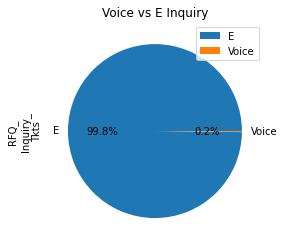

In [438]:
e_vs_voice = MERGED.groupby(['E.Voice'])['RFQ_\nInquiry_\nTkts'].sum()
print (e_vs_voice)

e_vs_voice.plot(kind='pie', autopct = '%1.1f%%', legend=True, title = 'Voice vs E Inquiry')

### First up, lets look at Voice vs E business

In [439]:
voice = MERGED[MERGED["E.Voice"].str.contains("Voice")] 
voice.head(5)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nStd_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nStd_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nStd_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta),E.Voice
135,PIMCO,CARRION,US Treasuries,VOX,530,265,-,100%,100%,0%,0%,-,2,1,-,100%,100%,0%,0%,-,71,141,-,100%,100%,0%,0%,-,Voice
136,VERITION FUND MANAGEMENT LLC (US),LEWIS,US Treasuries,VOX,100,100,-,100%,100%,0%,0%,-,1,1,-,100%,100%,0%,0%,-,44,44,-,100%,100%,0%,0%,-,Voice
137,BANCO CENTRAL DO BRASIL,MURPHY,US Treasuries,VOX,200,200,-,100%,100%,0%,0%,-,1,1,-,100%,100%,0%,0%,-,38,38,-,100%,100%,0%,0%,-,Voice
138,VANGUARD GROUP,NOTARO,US Treasuries,VOX,25,0,-,-,100%,-,-,-,1,0,-,-,100%,-,-,-,0,21,-,-,100%,-,-,-,Voice
139,DRW INVESTMENTS LLC,MAGALDI,US Treasuries,VOX,70,0,3.0,-,100%,-,-,-,2,0,3.0,-,100%,-,-,-,0,21,3.0,-,100%,-,-,-,Voice


In [440]:
voice.shape

(14, 29)

## There were 14 accounts that inquired for Voice trades in the last 4 weeks


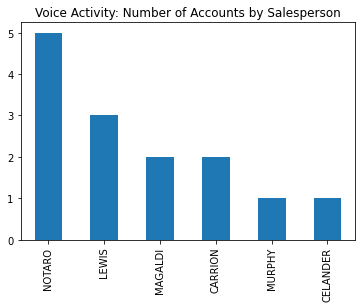

In [441]:
voice.Salesperson.value_counts().plot(kind='bar', title = 'Voice Activity: Number of Accounts by Salesperson')

## All voice trades recorded were US treasuries

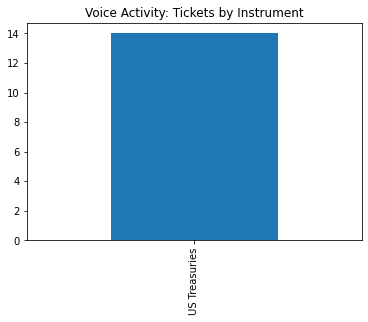

In [442]:
voice.Product.value_counts().plot(kind='bar', title = 'Voice Activity: Tickets by Instrument')

In [443]:
Voicetkts_inq= voice['RFQ_\nInquiry_\nTkts'].sum()
Voicetkts_ex= voice['RFQ_\nExecuted_\nTkts'].sum()


print(Voicetkts_inq)
print(Voicetkts_ex)

26
16


## There were 16 executed voice trades in the last 4 weeks, from a total of 26 inquiries

## 62% Hit Rate

In [444]:
voicesales2 = voice.groupby(['Salesperson'])['RFQ_\nExecuted_\nTkts', 'RFQ_\nInquiry_\nTkts'].sum()
print(voicesales2)

             RFQ_\nExecuted_\nTkts  RFQ_\nInquiry_\nTkts
Salesperson                                             
CARRION                          2                     3
CELANDER                         1                     1
LEWIS                            5                     5
MAGALDI                          1                     3
MURPHY                           1                     1
NOTARO                           6                    13


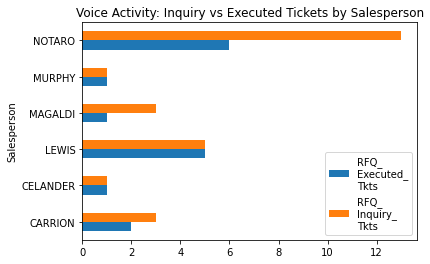

In [445]:
voicesales2.plot.barh(title = 'Voice Activity: Inquiry vs Executed Tickets by Salesperson')

### Inquiry and Executed voice tickets brokedown by Salesperson

## Joe Notaro
### 13 Inquiries, 6 Execution

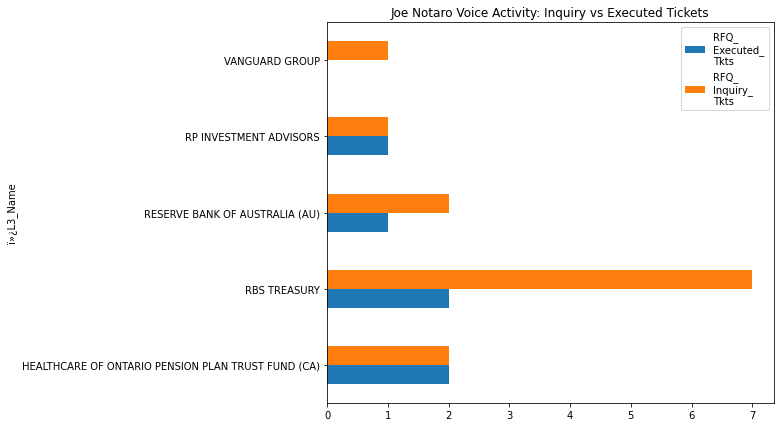

In [446]:
notaro_voice = voice[voice["Salesperson"].str.contains("NOTARO")] 

notaro_voice_client_sales = notaro_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
notaro_voice_client_sales.plot.barh(figsize = (8,7), title = 'Joe Notaro Voice Activity: Inquiry vs Executed Tickets')

## Pete Murphy
### 1 Inquiry, 1 Execution

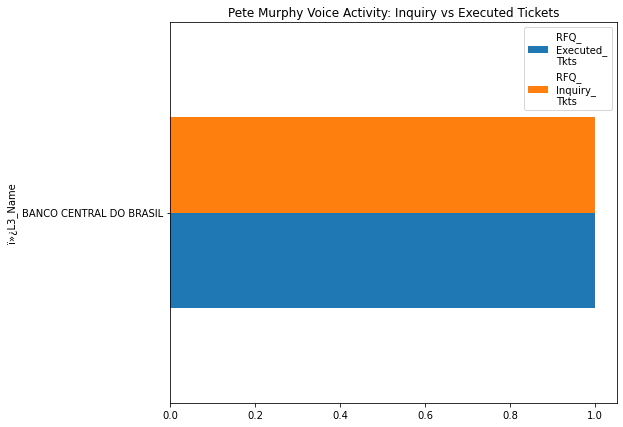

In [447]:
murphy_voice = voice[voice["Salesperson"].str.contains("MURPHY")] 

murphy_voice_client_sales = murphy_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
murphy_voice_client_sales.plot.barh(figsize = (8,7), title = 'Pete Murphy Voice Activity: Inquiry vs Executed Tickets')

## Kyle Lewis
### 5 Inquiries, 5 Executed

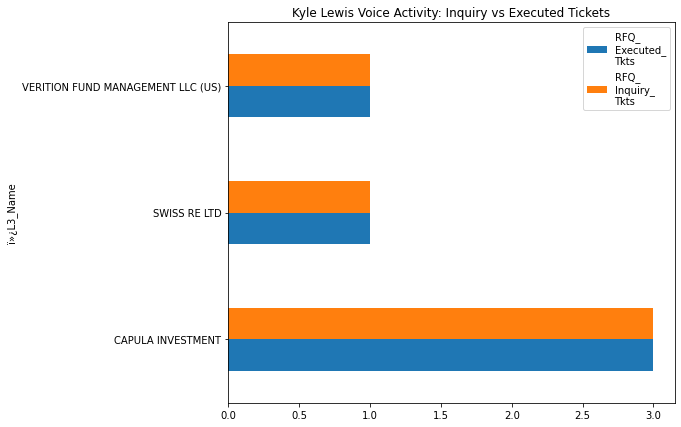

In [448]:
lewis_voice = voice[voice["Salesperson"].str.contains("LEWIS")] 

lewis_voice_client_sales = lewis_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
lewis_voice_client_sales.plot.barh(figsize = (8,7), title = 'Kyle Lewis Voice Activity: Inquiry vs Executed Tickets')

## Harriet Magaldi
### 3 Inquiries, 1 Executed

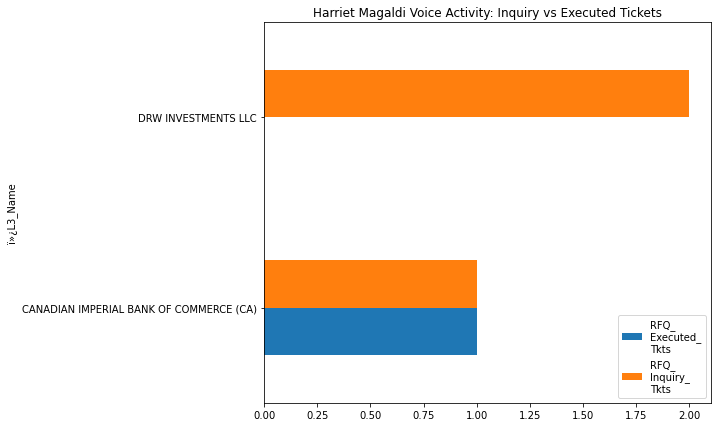

In [449]:
magaldi_voice = voice[voice["Salesperson"].str.contains("MAGALDI")] 

magaldi_voice_client_sales = magaldi_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
magaldi_voice_client_sales.plot.barh(figsize = (8,7), title = 'Harriet Magaldi Voice Activity: Inquiry vs Executed Tickets')

## Scott Celander
### 1 Inquiry, 1 Executed

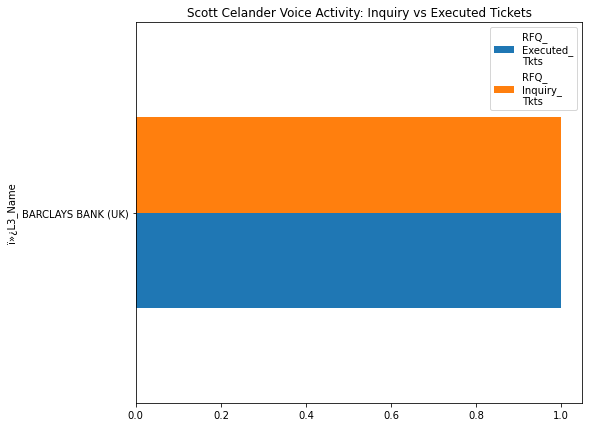

In [450]:
celander_voice = voice[voice["Salesperson"].str.contains("CELANDER")] 

celander_voice_client_sales = celander_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
celander_voice_client_sales.plot.barh(figsize = (8,7), title = 'Scott Celander Voice Activity: Inquiry vs Executed Tickets')

## Marcial Carrion
### 3 Inquiries, 2 Executed

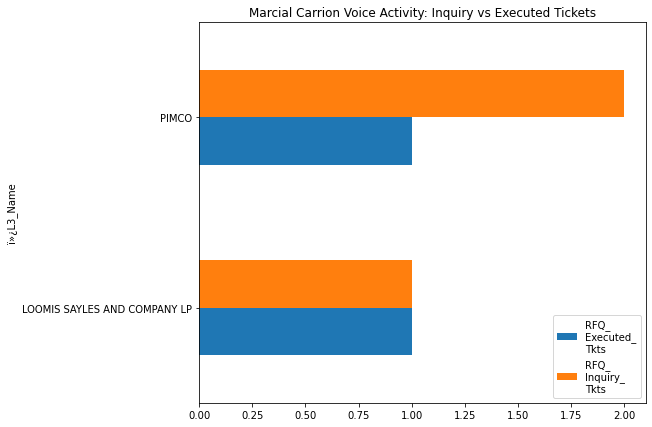

In [451]:
carrion_voice = voice[voice["Salesperson"].str.contains("CARRION")] 

carrion_voice_client_sales = carrion_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
carrion_voice_client_sales.plot.barh(figsize = (8,7), title = 'Marcial Carrion Voice Activity: Inquiry vs Executed Tickets')

## Brian Kelly
### No Voice Business

In [452]:
#kelly_voice = voice[voice["Salesperson"].str.contains("KELLY")] 

#kelly_voice_client_sales = kelly_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
#kelly_voice_client_sales.plot.barh(figsize = (8,7), title = 'Brian Kelly Voice Activity: Inquiry vs Executed Tickets')

## George Reilly
### No Voice Business

In [453]:
#reilly_voice = voice[voice["Salesperson"].str.contains("REILLY")] 

#reilly_voice_client_sales = reilly_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
#reilly_voice_client_sales.plot.barh(figsize = (8,7), title = 'George Reilly Voice Activity: Inquiry vs Executed Tickets')

In [454]:
voice_client_sales = voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
voice_client_sales.loc[voice_client_sales['RFQ_\nInquiry_\nTkts'] > 0]
print(voice_client_sales)

                                                    RFQ_\nExecuted_\nTkts  \
ï»¿L3_Name                                                                  
BANCO CENTRAL DO BRASIL                                                 1   
BARCLAYS BANK (UK)                                                      1   
CANADIAN IMPERIAL BANK OF COMMERCE (CA)                                 1   
CAPULA INVESTMENT                                                       3   
DRW INVESTMENTS LLC                                                     0   
HEALTHCARE OF ONTARIO PENSION PLAN TRUST FUND (CA)                      2   
LOOMIS SAYLES AND COMPANY LP                                            1   
PIMCO                                                                   1   
RBS TREASURY                                                            2   
RESERVE BANK OF AUSTRALIA (AU)                                          1   
RP INVESTMENT ADVISORS                                                  1   

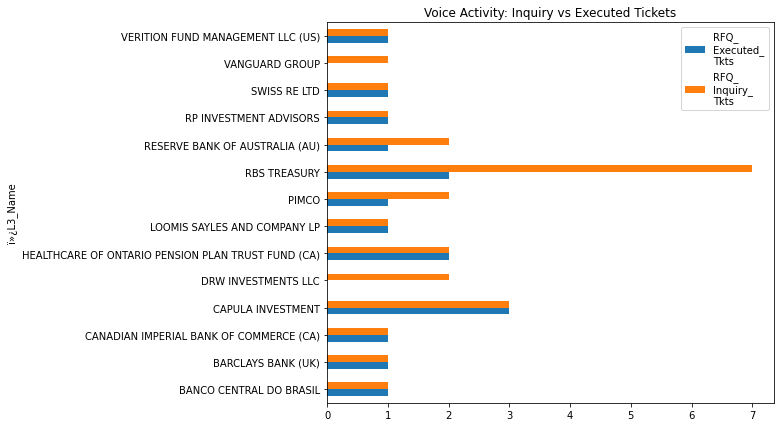

In [455]:
voice_client_sales.plot.barh(figsize = (8,7), title = 'Voice Activity: Inquiry vs Executed Tickets')

In [456]:
voice_client_sales_notional = voice.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()

## Voice Activity: Inquiry vs Executed Notional by client

####  * Pimco inquired for the highest volume but executed less than half of it. 
####  * 9 of the 14 accounts to inquire executed 100% of inquiry volume. 
####  * DRW & Vanguard were the only accounts with no execution

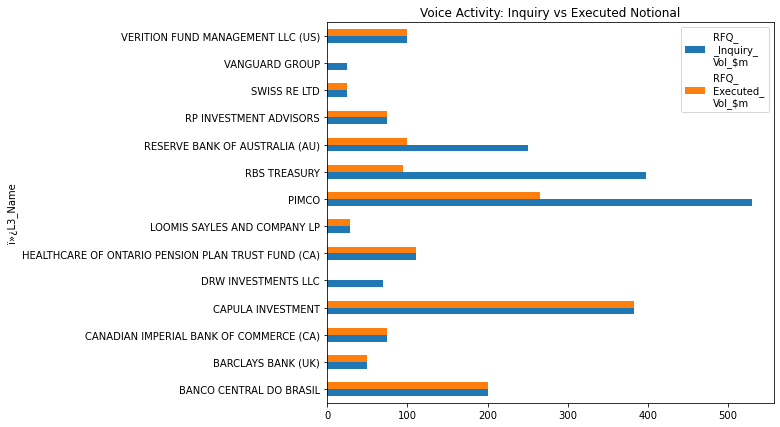

In [457]:
voice_client_sales_notional.plot.barh(figsize = (8,7), title = 'Voice Activity: Inquiry vs Executed Notional')

# Delta
### Kyle Lewis was responsible for more Delta than any other salesperson
### Joe Notaro was the only other salesperson to print over 100k dv01

In [458]:
voice_delta = voice.groupby(['Salesperson'])['RFQ_\n_Inquiry_\nDelta_$k',  'RFQ_\nExecuted_\nDelta_$k'].sum()
print(voice_delta)

             RFQ_\nExecuted_\nDelta_$k
Salesperson                           
CARRION                             79
CELANDER                            40
LEWIS                              208
MAGALDI                             32
MURPHY                              38
NOTARO                             117


In [459]:
delta = voice_delta['RFQ_\nExecuted_\nDelta_$k'].sum()
print(delta)

514


### 514k DELTA WAS EXECUTED OVERALL

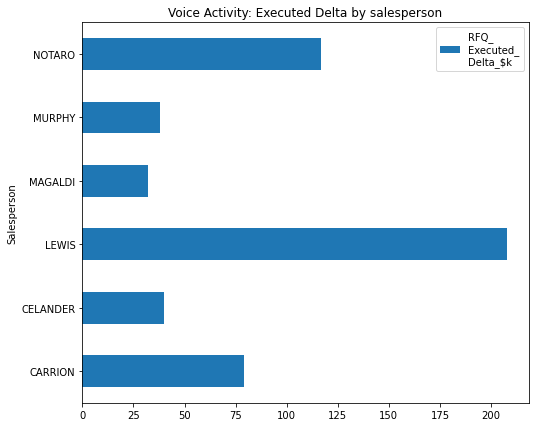

In [460]:
voice_delta.plot.barh(figsize = (8,7), title = 'Voice Activity: Executed Delta by salesperson')

### Most Delta was executed with Capula
### Despite high inquiry and execution, RBS Treasury Delta is 40k

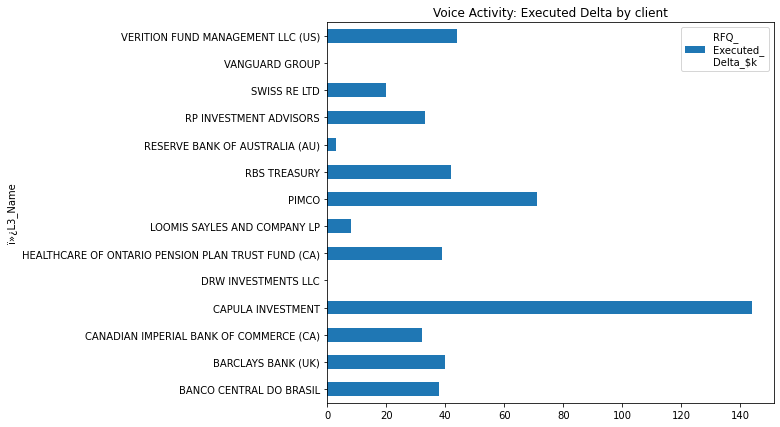

In [461]:
client_voice_delta = voice.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nDelta_$k',  'RFQ_\nExecuted_\nDelta_$k'].sum()
client_voice_delta.plot.barh(figsize = (8,7), title = 'Voice Activity: Executed Delta by client')

# E-Business

In [462]:
e = MERGED[MERGED["E.Voice"].str.contains("E")] 
e.head(5)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nStd_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nStd_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nStd_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta),E.Voice
0,INVESCO,NOTARO,US Treasuries,BET,6011,404,4.6,12%,93%,40%,1%,24%,910,459,4.9,52%,99%,37%,0%,35%,22,171,4.6,16%,99%,54%,5%,17%,E
1,GELBER GROUP LLC,MURPHY,US Treasuries,BET,4426,79,5.0,5%,51%,3%,0%,-,463,9,5.0,5%,52%,4%,0%,-,3,133,5.0,6%,54%,6%,0%,-,E
2,GELBER GROUP LLC,MURPHY,Unclassified,BET,70,0,5.0,-,14%,-,-,-,8,0,5.0,-,13%,-,-,-,0,3,5.0,-,10%,-,-,-,E
3,UBS ASSET MANAGEMENT,KELLY,US Treasuries,BET,2546,370,5.0,18%,96%,35%,14%,71%,1202,321,5.0,27%,99%,47%,0%,23%,57,508,5.0,16%,85%,43%,9%,63%,E
4,UBS ASSET MANAGEMENT,KELLY,US Agencies,BET,1,0,10.8,100%,1%,0%,0%,-,25,1,10.4,100%,4%,0%,0%,-,0,0,10.7,100%,4%,0%,0%,-,E


In [463]:
e.shape

(137, 29)

### 136 accounts inquired electronically in the last 4 weeks

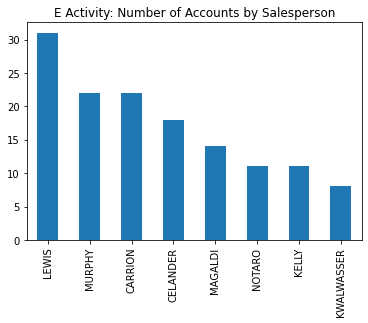

In [464]:
e.Salesperson.value_counts().plot(kind='bar', title = 'E Activity: Number of Accounts by Salesperson')

### Unlike voice activity, e business was not just UST, however it is all cash products.

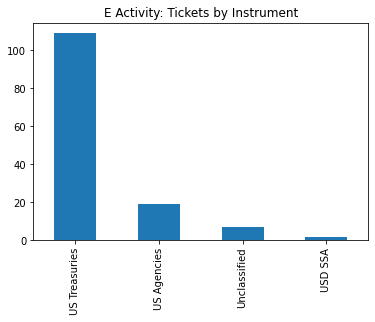

In [465]:
e.Product.value_counts().plot(kind='bar', title = 'E Activity: Tickets by Instrument')

In [466]:
etkts_inq= e['RFQ_\nInquiry_\nTkts'].sum()
etkts_ex= e['RFQ_\nExecuted_\nTkts'].sum()


print(etkts_inq)
print(etkts_ex)

14084
2279


## There were 9,794 inquiries and 2,274 executed tickets. 
## A hit rate of 23%.

In [467]:
evol_inq= e['RFQ_\n_Inquiry_\nVol_$m'].sum()
evol_ex= e['RFQ_\nExecuted_\nVol_$m'].sum()


print(evol_inq)
print(evol_ex)

88066
6680


## The notional inquired was 24,013mm, with 6,680mm executed.
## A hit rate of 28%

In [468]:
esales2 = e.groupby(['Salesperson'])['RFQ_\nInquiry_\nTkts', 'RFQ_\nExecuted_\nTkts'].sum()
print(esales2)

             RFQ_\nInquiry_\nTkts  RFQ_\nExecuted_\nTkts
Salesperson                                             
CARRION                      2647                    294
CELANDER                     1827                    161
KELLY                        1526                    380
KWALWASSER                    345                      5
LEWIS                        3991                    678
MAGALDI                       919                    171
MURPHY                       1092                     62
NOTARO                       1737                    528


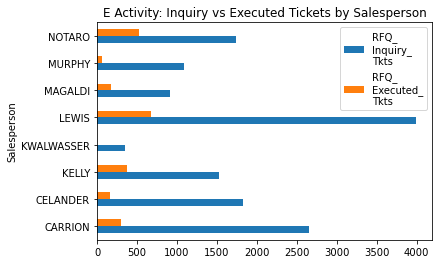

In [469]:
esales2.plot.barh(title = 'E Activity: Inquiry vs Executed Tickets by Salesperson')

### Inquiry and Executed voice tickets brokedown by Salesperson

## Joe Notaro
### 1,737 Inquiry Tkts, 528 Executed
### <span style='color:Green'> 30% Hit Rate (Tkts)

### 13,082 Inquiry Tkts, 888 Executed
### <span style='color:Red'> 7% Hit Rate (Tkts)

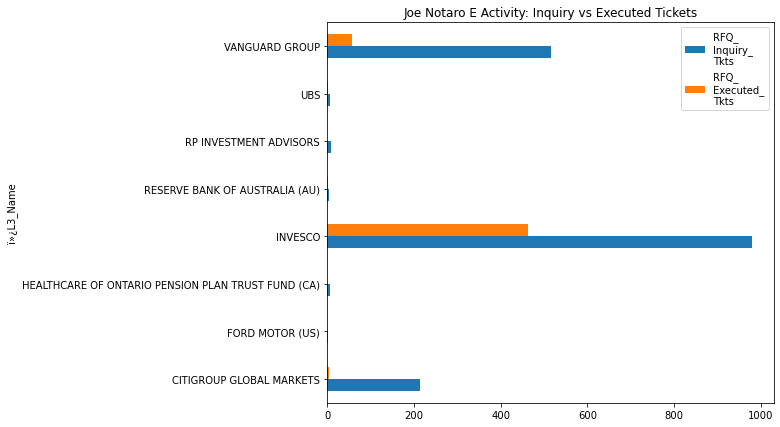

In [470]:
notaro_e = e[e["Salesperson"].str.contains("NOTARO")] 

notaro_e_client_sales = notaro_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts','RFQ_\nExecuted_\nTkts' ].sum()
notaro_e_client_sales.plot.barh(figsize = (8,7), title = 'Joe Notaro E Activity: Inquiry vs Executed Tickets')

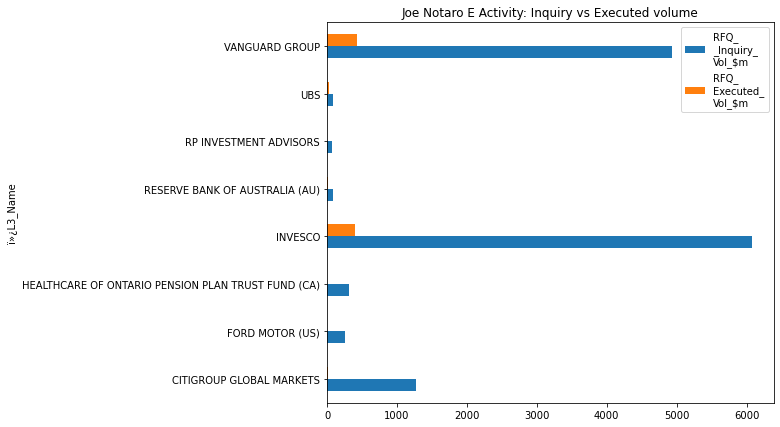

In [471]:
notaro_e_vol = e[e["Salesperson"].str.contains("NOTARO")] 

notaro_e_vol_client_sales = notaro_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
notaro_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Joe Notaro E Activity: Inquiry vs Executed volume')

In [472]:
notaro_etkts_inq= notaro_e['RFQ_\nInquiry_\nTkts'].sum()
notaro_etkts_ex= notaro_e['RFQ_\nExecuted_\nTkts'].sum()


print(notaro_etkts_inq)
print(notaro_etkts_ex)

1737
528


In [473]:
notaro_evol_inq= notaro_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
notaro_evol_ex= notaro_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(notaro_evol_inq)
print(notaro_evol_ex)

13082
888


## Pete Murphy
### 1,092 Inquiry Tkts, 62 Executed
###  <span style='color:Red'> 6% Hit Rate Tkts

### 15,117 Inquiry Vol, 1,612 Executed 
### <span style='color:Red'> 10% Hit Rate Vol


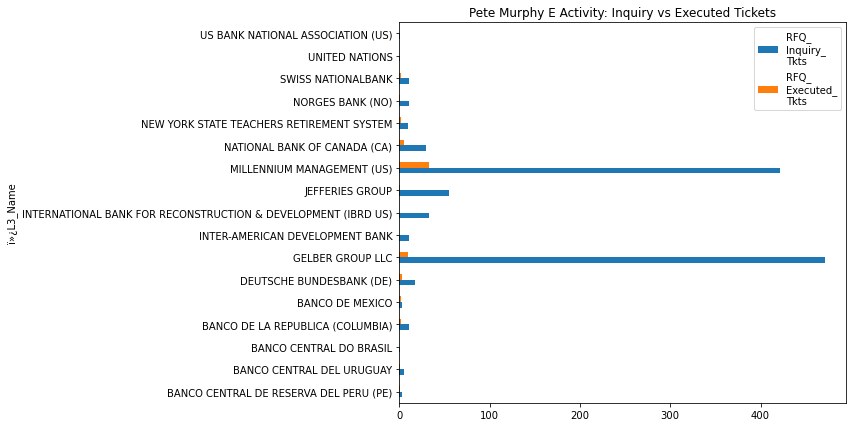

In [474]:
murphy_e = e[e["Salesperson"].str.contains("MURPHY")] 

murphy_e_client_sales = murphy_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts' ].sum()
murphy_e_client_sales.plot.barh(figsize = (8,7), title = 'Pete Murphy E Activity: Inquiry vs Executed Tickets')

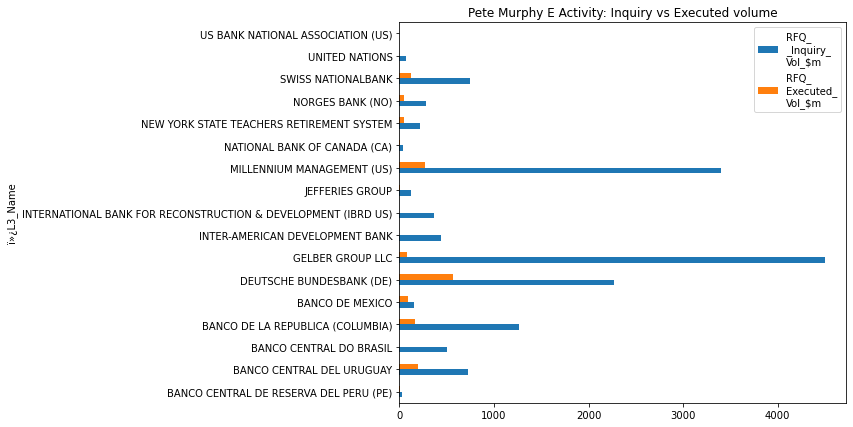

In [475]:
murphy_e_vol = e[e["Salesperson"].str.contains("MURPHY")] 

murphy_e_vol_client_sales = murphy_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
murphy_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Pete Murphy E Activity: Inquiry vs Executed volume')

In [476]:
murphy_etkts_inq= murphy_e['RFQ_\nInquiry_\nTkts'].sum()
murphy_etkts_ex= murphy_e['RFQ_\nExecuted_\nTkts'].sum()


print(murphy_etkts_inq)
print(murphy_etkts_ex)

1092
62


In [477]:
murphy_evol_inq= murphy_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
murphy_evol_ex= murphy_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(murphy_evol_inq)
print(murphy_evol_ex)
murphy_vol_hit_rate = murphy_evol_ex/murphy_evol_inq

print(murphy_vol_hit_rate)

15117
1612
0.1066349143348548


## Kyle Lewis
### 2,357 Inquiry Tkts, 678 Executed
### <span style='color:Green'>29% Hit Rate Tkts

### 11,148 Inquiry Vol, 1,434 Executed
### <span style='color:Red'>12% Hit Rate Vol

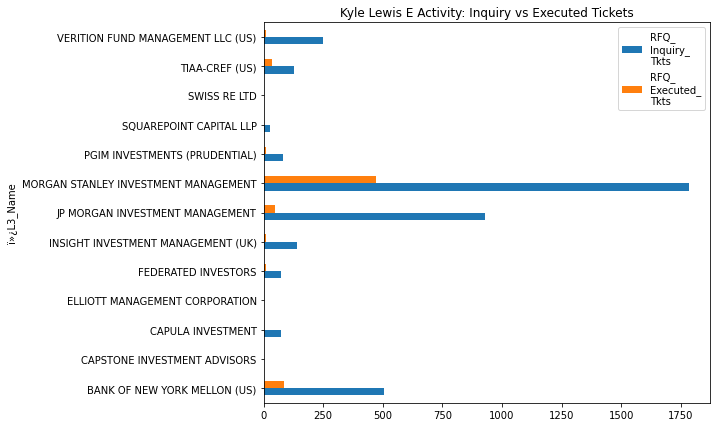

In [478]:
lewis_e = e[e["Salesperson"].str.contains("LEWIS")] 

lewis_e_client_sales = lewis_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts' ].sum()
lewis_e_client_sales.plot.barh(figsize = (8,7), title = 'Kyle Lewis E Activity: Inquiry vs Executed Tickets')

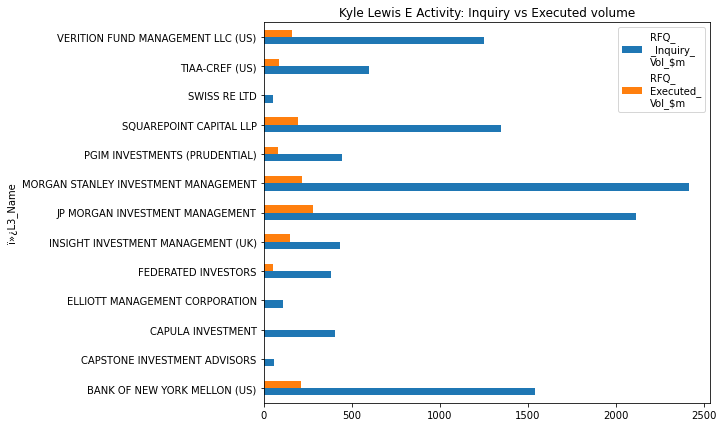

In [479]:
lewis_e_vol = e[e["Salesperson"].str.contains("LEWIS")] 

lewis_e_vol_client_sales = lewis_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
lewis_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Kyle Lewis E Activity: Inquiry vs Executed volume')

In [480]:
lewis_etkts_inq= lewis_e['RFQ_\nInquiry_\nTkts'].sum()
lewis_etkts_ex= lewis_e['RFQ_\nExecuted_\nTkts'].sum()


print(lewis_etkts_inq)
print(lewis_etkts_ex)

3991
678


In [481]:
lewis_evol_inq= lewis_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
lewis_evol_ex= lewis_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(lewis_evol_inq)
print(lewis_evol_ex)
lewis_vol_hit_rate = lewis_evol_ex/lewis_evol_inq

print(lewis_vol_hit_rate)

11148
1434
0.1286329386437029


## Harriet Magaldi
### 919 Inquiry Tkts, 171 Executed
### <span style='color:Green'>19% Hit Rate Tickets

### 2,332 Inquiry Tkts, 58 Executed
### <span style='color:Red'>2% Hit Rate Vol

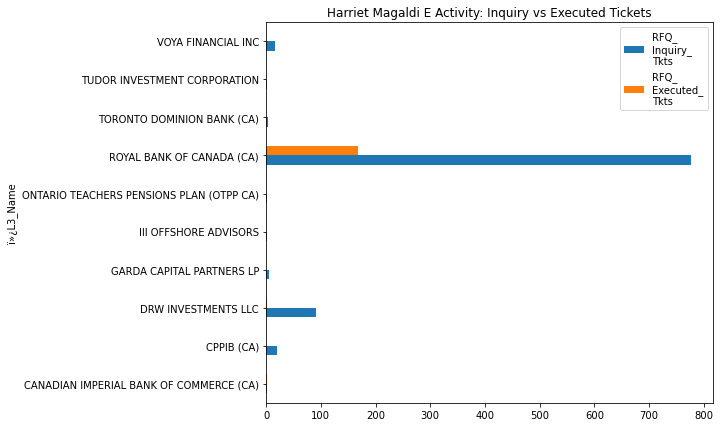

In [482]:
magaldi_e = e[e["Salesperson"].str.contains("MAGALDI")] 

magaldi_e_client_sales = magaldi_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
magaldi_e_client_sales.plot.barh(figsize = (8,7), title = 'Harriet Magaldi E Activity: Inquiry vs Executed Tickets')

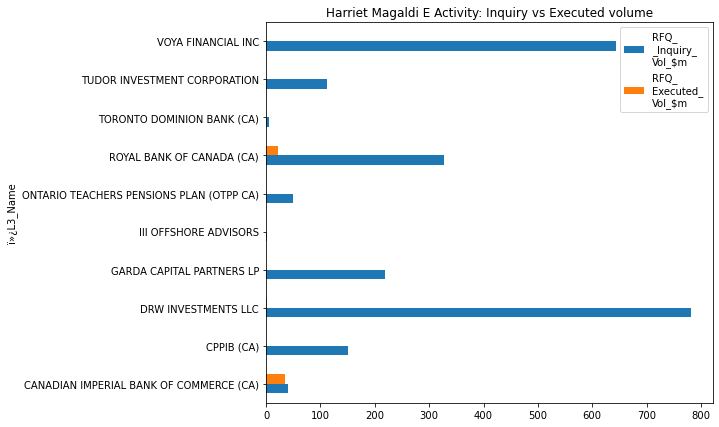

In [483]:
magaldi_e_vol = e[e["Salesperson"].str.contains("MAGALDI")] 

magaldi_e_vol_client_sales = magaldi_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
magaldi_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Harriet Magaldi E Activity: Inquiry vs Executed volume')

In [484]:
magaldi_etkts_inq= magaldi_e['RFQ_\nInquiry_\nTkts'].sum()
magaldi_etkts_ex= magaldi_e['RFQ_\nExecuted_\nTkts'].sum()


print(magaldi_etkts_inq)
print(magaldi_etkts_ex)

919
171


In [485]:
magaldi_evol_inq= magaldi_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
magaldi_evol_ex= magaldi_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(magaldi_evol_inq)
print(magaldi_evol_ex)
magaldi_vol_hit_rate = magaldi_evol_ex/magaldi_evol_inq

print(magaldi_vol_hit_rate)

2332
58
0.024871355060034305


## Scott Celander
### 1,827 Inquiry Tkts, 161 Executed
### <span style='color:Red'>9% Hit Rate

### 7,525 Inquiry Tkts, 434 Executed
### <span style='color:Red'>6% Hit Rate vol


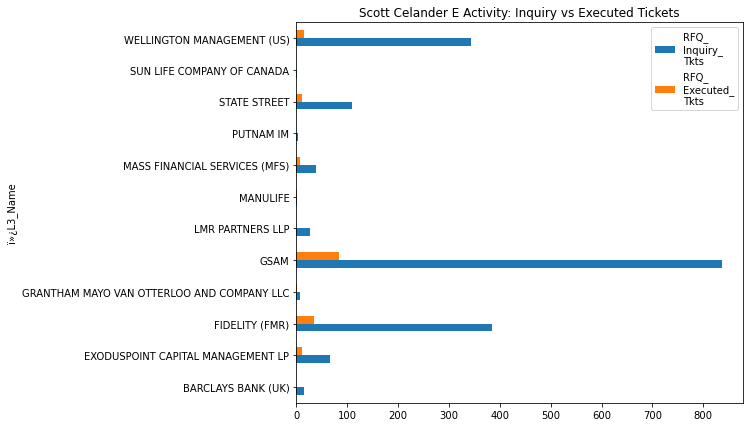

In [486]:
celander_e = e[e["Salesperson"].str.contains("CELANDER")] 

celander_e_client_sales = celander_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
celander_e_client_sales.plot.barh(figsize = (8,7), title = 'Scott Celander E Activity: Inquiry vs Executed Tickets')

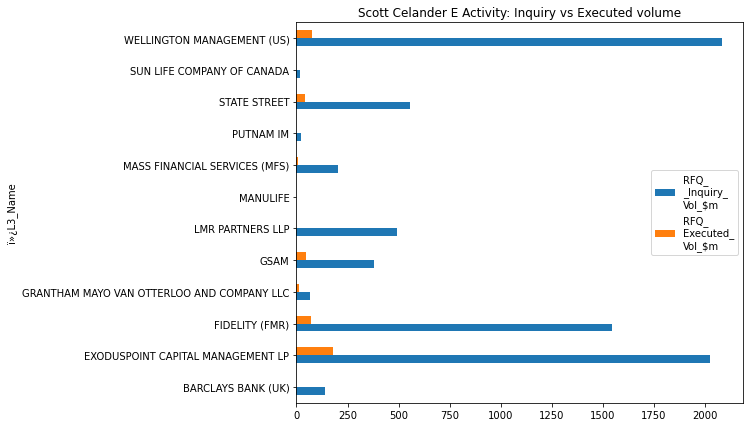

In [487]:
celander_e_vol = e[e["Salesperson"].str.contains("CELANDER")] 

celander_e_vol_client_sales = celander_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
celander_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Scott Celander E Activity: Inquiry vs Executed volume')

In [488]:
celander_etkts_inq= celander_e['RFQ_\nInquiry_\nTkts'].sum()
celander_etkts_ex= celander_e['RFQ_\nExecuted_\nTkts'].sum()


print(celander_etkts_inq)
print(celander_etkts_ex)

1827
161


In [489]:
celander_evol_inq= celander_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
celander_evol_ex= celander_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(celander_evol_inq)
print(celander_evol_ex)
celander_vol_hit_rate = celander_evol_ex/celander_evol_inq

print(celander_vol_hit_rate)

7525
434
0.05767441860465116


## Marcial Carrion
### 1,193 Inquiry Tkts, 294 Executed
### <span style='color:Green'>25% Hit Rate

### 9788 Inquiry Vol, 1,553 Executed
### <span style='color:Red'>16% Hit Rate

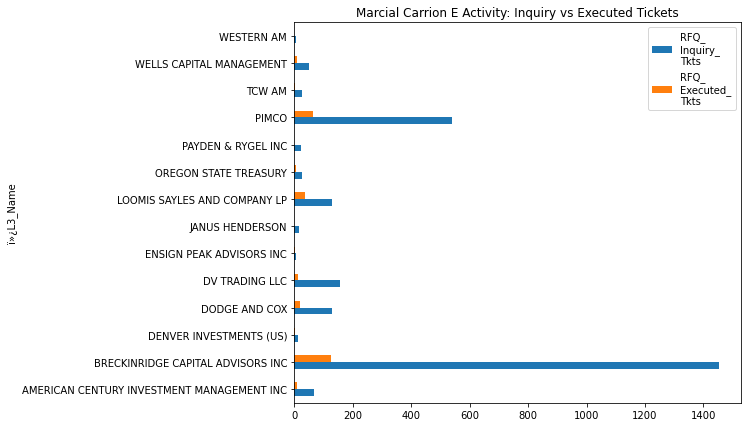

In [490]:
carrion_e = e[e["Salesperson"].str.contains("CARRION")] 

carrion_e_client_sales = carrion_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
carrion_e_client_sales.plot.barh(figsize = (8,7), title = 'Marcial Carrion E Activity: Inquiry vs Executed Tickets')

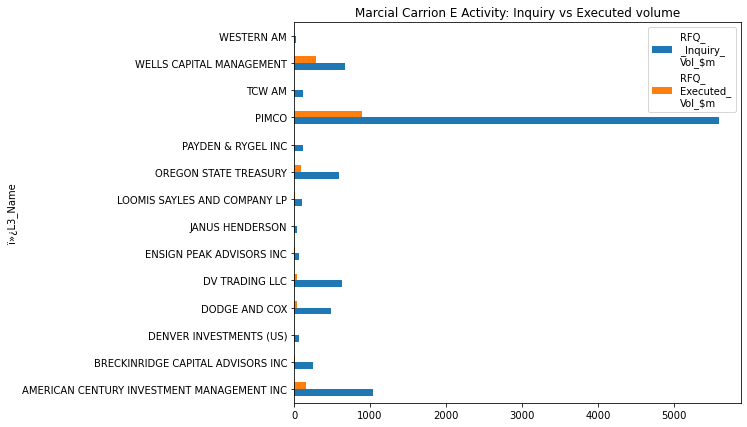

In [491]:
carrion_e_vol = e[e["Salesperson"].str.contains("CARRION")] 

carrion_e_vol_client_sales = carrion_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
carrion_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Marcial Carrion E Activity: Inquiry vs Executed volume')

In [492]:
carrion_etkts_inq= carrion_e['RFQ_\nInquiry_\nTkts'].sum()
carrion_etkts_ex= carrion_e['RFQ_\nExecuted_\nTkts'].sum()


print(carrion_etkts_inq)
print(carrion_etkts_ex)

2647
294


In [493]:
carrion_evol_inq= carrion_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
carrion_evol_ex= carrion_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(carrion_evol_inq)
print(carrion_evol_ex)
carrion_vol_hit_rate = carrion_evol_ex/carrion_evol_inq

print(carrion_vol_hit_rate)

9788
1553
0.1586636697997548


## Brian Kelly
### 1,526 Inquiry Tkts, 380 Executed
### <span style='color:Green'>25% Hit Rate Tickets

### 6711 Inquiry Vol, 686 Executed
### <span style='color:Red'>10% Hit Rate vol

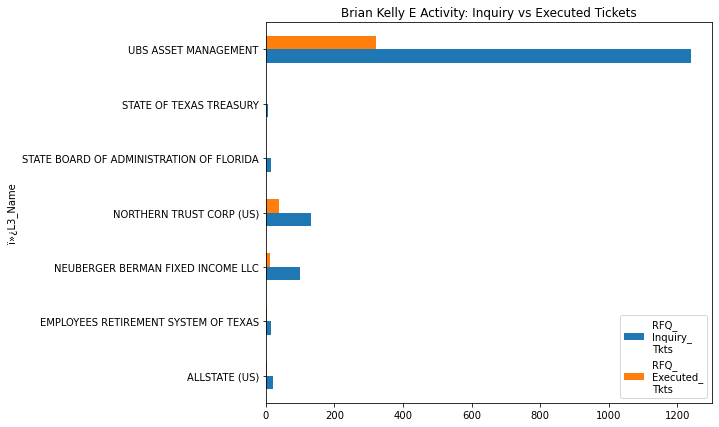

In [494]:
kelly_e = e[e["Salesperson"].str.contains("KELLY")] 

kelly_e_client_sales = kelly_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
kelly_e_client_sales.plot.barh(figsize = (8,7), title = 'Brian Kelly E Activity: Inquiry vs Executed Tickets')

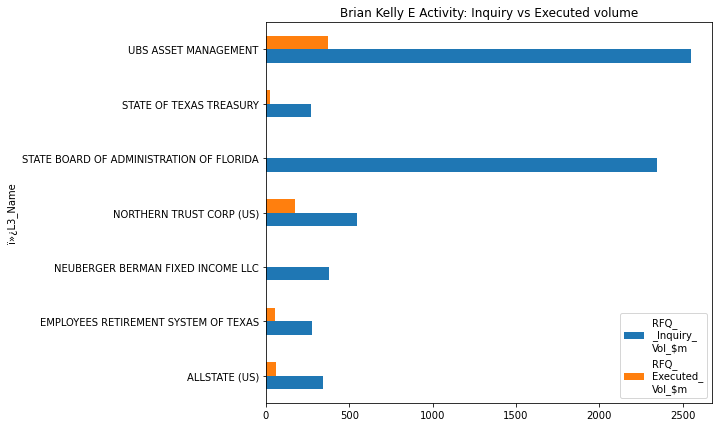

In [495]:
kelly_e_vol = e[e["Salesperson"].str.contains("KELLY")] 

kelly_e_vol_client_sales = kelly_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
kelly_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Brian Kelly E Activity: Inquiry vs Executed volume')

In [496]:
kelly_etkts_inq= kelly_e['RFQ_\nInquiry_\nTkts'].sum()
kelly_etkts_ex= kelly_e['RFQ_\nExecuted_\nTkts'].sum()
kelly_etkts_hit_rate = kelly_etkts_ex/kelly_etkts_inq

print(kelly_etkts_inq)
print(kelly_etkts_ex)
print(kelly_etkts_hit_rate)

1526
380
0.2490170380078637


In [497]:
kelly_evol_inq= kelly_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
kelly_evol_ex= kelly_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()
kelly_vol_hit_rate = kelly_evol_ex/kelly_evol_inq

print(kelly_evol_inq)
print(kelly_evol_ex)
print(kelly_vol_hit_rate)

6711
686
0.1022202354343615


## George Reilly
## No Activity

In [498]:
#reilly_e = e[e["Salesperson"].str.contains("REILLY")] 

#reilly_e_client_sales = reilly_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'  ].sum()
#reilly_e_client_sales.plot.barh(figsize = (8,7), title = 'George Reilly E Activity: Inquiry vs Executed Tickets')

In [499]:
#reilly_e_vol = e[e["Salesperson"].str.contains("REILLY")] 

#reilly_e_vol_client_sales = reilly_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
#reilly_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'George Reilly E Activity: Inquiry vs Executed volume')

In [500]:
#reilly_etkts_inq= reilly_e['RFQ_\nInquiry_\nTkts'].sum()
#reilly_etkts_ex= reilly_e['RFQ_\nExecuted_\nTkts'].sum()
#reilly_etkts_hit_rate = reilly_etkts_ex/reilly_etkts_inq

#print(reilly_etkts_inq)
#print(reilly_etkts_ex)
#print(reilly_etkts_hit_rate)

In [501]:
#reilly_evol_inq= reilly_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
#reilly_evol_ex= reilly_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()
#reilly_vol_hit_rate = reilly_evol_ex/kelly_evol_inq

#print(reilly_evol_inq)
#print(reilly_evol_ex)
#print(reilly_vol_hit_rate)

# Reccomendations
    ### 1. Increase voice trade capture, there are no swaps or options currently captured by Flow Sales for US Rates Sales
    
    ### 2. Improve voice RFQ capture, hit rate is 62% which is likely because sales primarily capture wins, instead of all           activity
    
    ### 3. Establish voice business target - how many voice trades should sales be aiming to get on a weekly basis, both             individiually and cumulatively.

    ### 4. There is a sharp drop in hit rates when looking at vol vs tickets, indicating that larger size has a lower hit           rate.
    
    ### 5. Discuss plans for accounts with high inquiry and low execution - GSAM, Royal Bank of Canada, JPMIM, Gelber,               Milenium...eithe E only or improved tiering.